In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

Data type: <class 'pandas.core.series.Series'>


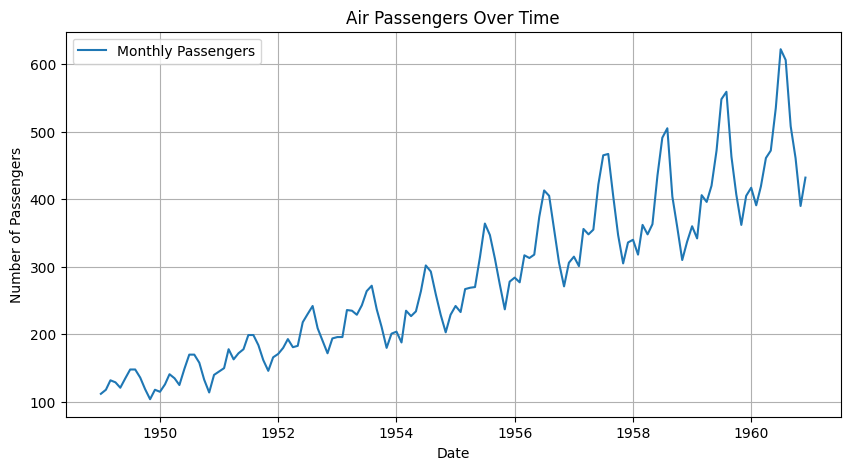

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (you can also upload it using files.upload())
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, header=0, parse_dates=['Month'], index_col='Month')

# Convert to a Series if it's a single column
if len(data.columns) == 1:
    data = data.iloc[:, 0]

# Check the structure
print(data.head())
print("\nData type:", type(data))

# Plot to visualize the trend and seasonality
plt.figure(figsize=(10,5))
plt.plot(data, label='Monthly Passengers')
plt.title("Air Passengers Over Time")
plt.ylabel("Number of Passengers")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# ADF test to check for stationarity
result = adfuller(data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the p-value is greater than 0.05, the series is non-stationary.

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


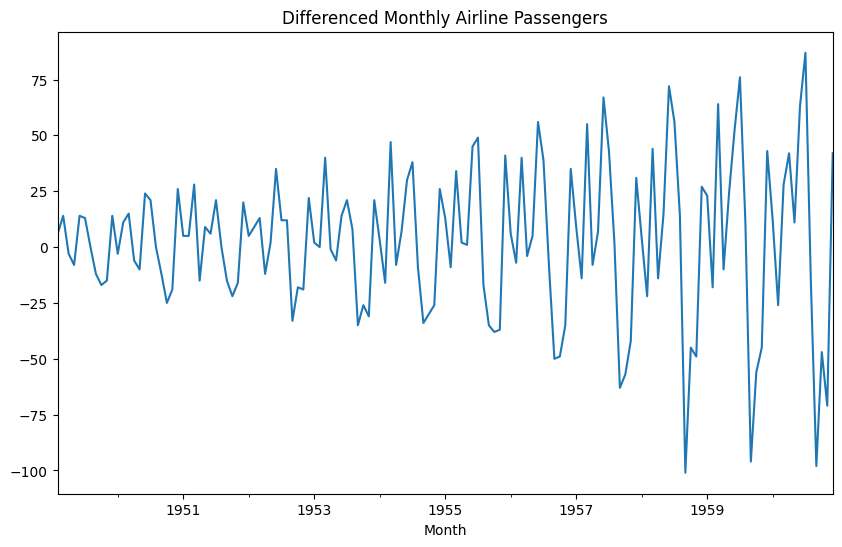

In [4]:
# Take the first difference to make the series stationary
data_diff = data.diff().dropna()

# Plot the differenced data
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Monthly Airline Passengers')
plt.show()


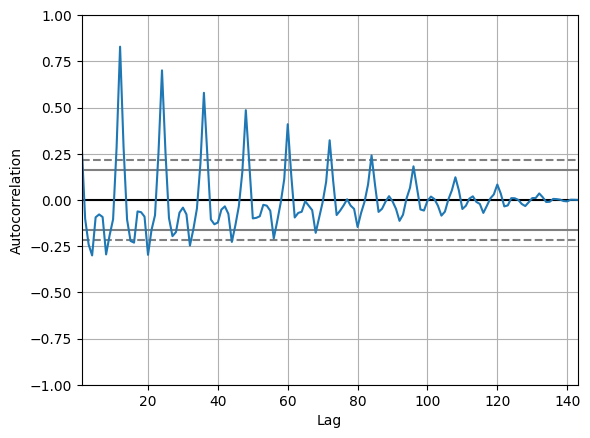

In [5]:
# Plot the autocorrelation plot (ACF)
autocorrelation_plot(data_diff)
plt.show()

In [6]:
# Fit the ARIMA model
model = ARIMA(data, order=(1, 1, 1))  # p=1, d=1, q=1
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 15 Apr 2025   AIC                           1394.683
Time:                        12:57:13   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with specified seasonal order
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # p=1, d=1, q=1, P=1, D=1, Q=1, S=12
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 15 Apr 2025   AIC                           1022.299
Time:                                    12:57:21   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

<ipython-input-8-4efc9d15d9d7>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')


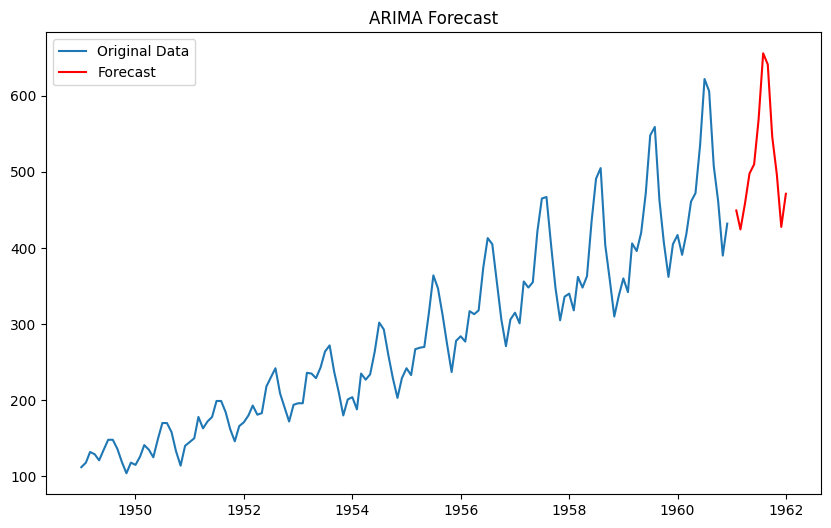

In [8]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

<ipython-input-9-2ec747f0226f>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast_values, label='Forecast', color='red')
<ipython-input-9-2ec747f0226f>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.fill_between(pd.date_range(data.index[-1], periods=13, freq='M')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)


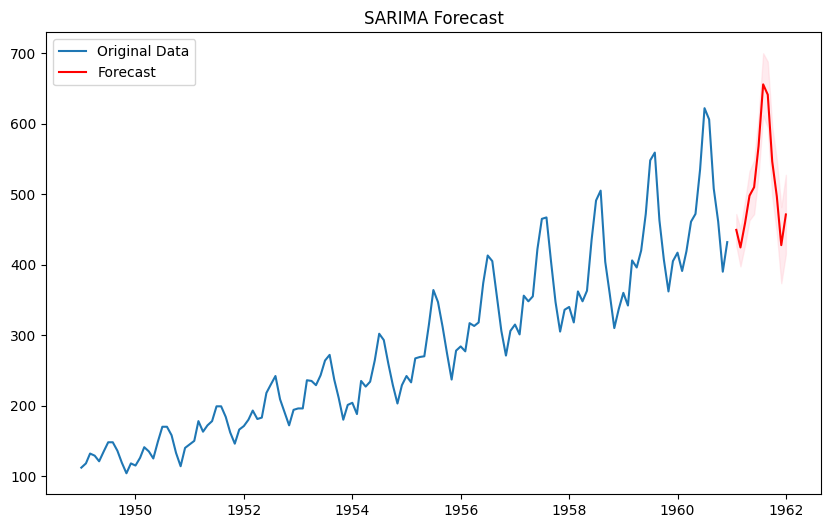

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast the next 12 months using the SARIMA model
forecast = model_fit.get_forecast(steps=12)

# Get the forecasted values and their confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')

# Plot the forecast values (next 12 months)
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast_values, label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(pd.date_range(data.index[-1], periods=13, freq='M')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMA Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) for ARIMA: 91.23


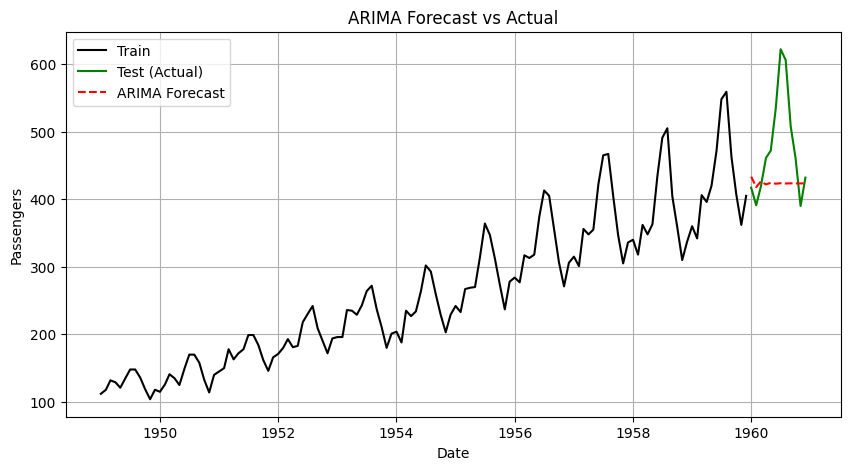

In [14]:
series = data  # Use the data Series directly
# Split into train and test
train = series[:'1959']
test = series['1960':]

# Fit the ARIMA model
model_arima = ARIMA(train, order=(1, 1, 1))  # You can tune (p,d,q)
model_arima_fit = model_arima.fit()

# Forecast the next 12 months (same length as test set)
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse_arima = math.sqrt(mean_squared_error(test, forecast_arima))
print(f'Root Mean Squared Error (RMSE) for ARIMA: {rmse_arima:.2f}')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train', color='black')
plt.plot(test, label='Test (Actual)', color='green')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE) for SARIMA: 21.19


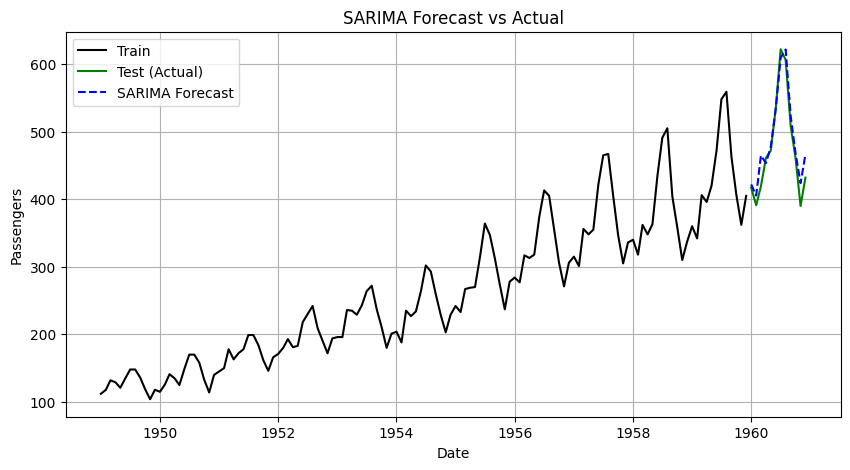

In [16]:
series = data

# Split the data (last 12 months as test set)
train_size = len(series) - 12
train, test = series[:train_size], series[train_size:]

# Fit SARIMA model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast next 12 months
forecast_sarima = model_sarima_fit.get_forecast(steps=12)
forecast_values = forecast_sarima.predicted_mean

# Calculate RMSE
rmse_sarima = math.sqrt(mean_squared_error(test, forecast_values))
print(f'Root Mean Squared Error (RMSE) for SARIMA: {rmse_sarima:.2f}')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train', color='black')
plt.plot(test, label='Test (Actual)', color='green')
plt.plot(forecast_values, label='SARIMA Forecast', color='blue', linestyle='--')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

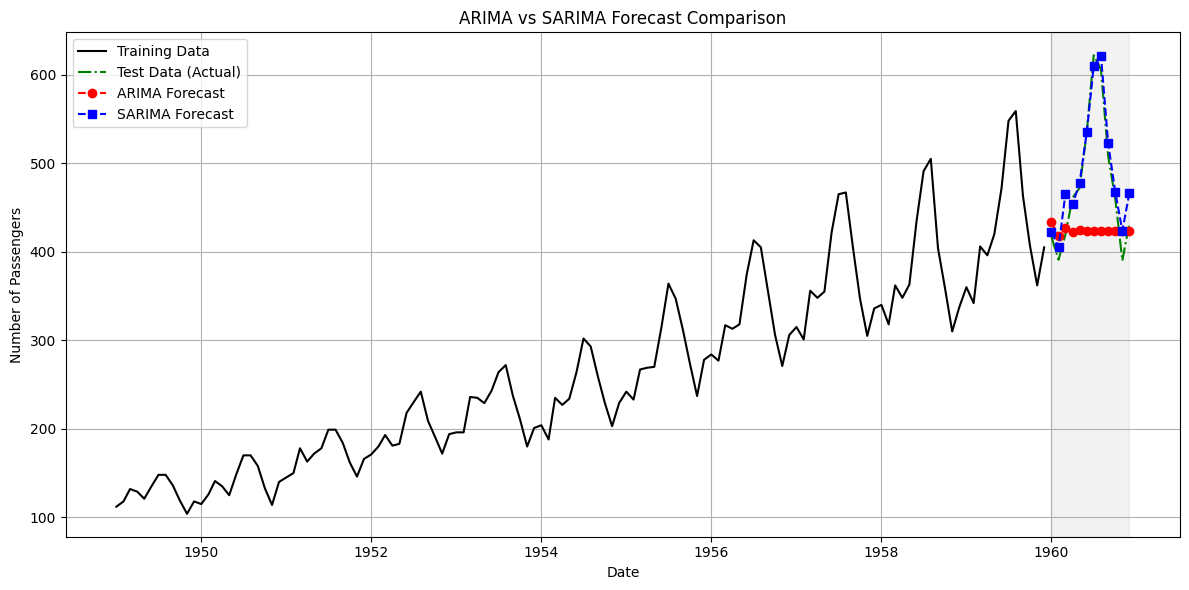

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA model
model_arima = ARIMA(train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=12)

# SARIMA model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.get_forecast(steps=12)
forecast_sarima_values = forecast_sarima.predicted_mean

# Forecast dates
forecast_index = pd.date_range(start=test.index[0], periods=12, freq='MS')  # 'MS' = Month Start

# Plot
plt.figure(figsize=(12, 6))

# Historical data
plt.plot(train.index, train, label='Training Data', color='black')
plt.plot(test.index, test, label='Test Data (Actual)', color='green', linestyle='-.')

# Forecasts
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--', marker='o')
plt.plot(forecast_index, forecast_sarima_values, label='SARIMA Forecast', color='blue', linestyle='--', marker='s')

# Forecast range shading
plt.axvspan(forecast_index[0], forecast_index[-1], color='gray', alpha=0.1)

# Labels and legends
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()